In [1]:
import applications as app
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch

noise_std = 0.75
patch_size = 7
alpha = float('inf')
downscale_ratio = 0.75
num_levels = 9
device = "cuda"

In [2]:
def alpha_tile(image: torch.Tensor) -> torch.Tensor:
    _, h, w = image.shape
    std = 10

    left_strip = image[:, :, 0].unsqueeze(-1)
    assert left_strip.shape == (3, h, 1), left_strip.shape
    left_smear = left_strip.repeat(1, 1, w)
    assert left_smear.shape == (3, h, w), left_smear.shape
    left_mask = torch.linspace(0, w, w)
    assert left_mask.shape == (w,)
    left_mask = torch.exp(-((left_mask - w) ** 2) / (2 * std ** 2))
    left_mask = left_mask.unsqueeze(0).unsqueeze(0).repeat(3, h, 1)
    left_image = left_smear * left_mask + image * (1 - left_mask)
    
    top_strip = image[:, 0, :].unsqueeze(1)
    assert top_strip.shape == (3, 1, w), top_strip.shape
    top_smear = top_strip.repeat(1, h, 1)
    assert top_smear.shape == (3, h, w), top_smear.shape
    top_mask = torch.linspace(0, h, h)
    top_mask = torch.exp(-((top_mask - h) ** 2) / (2 * std ** 2))
    assert top_mask.shape == (h,)
    top_mask = top_mask.unsqueeze(0).unsqueeze(-1).repeat(3, 1, w)

    return top_smear * top_mask + left_image * (1 - top_mask)

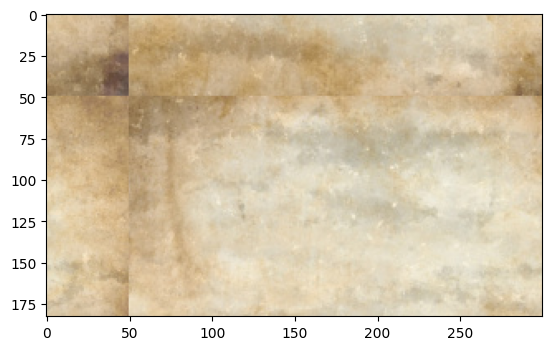

In [26]:
#image = utils.imread("data/generation/balloons.png")
#image = utils.imread("data/structural_analogy/snow_real_a.jpeg")
#image = utils.imread("data/structural_analogy/snow_real_b.jpeg")
#image = utils.imread("data/conditional_inpainting/balloons_in_blue.png")
#image = utils.imread("data/bricks-small.jpg")
#image = utils.imread("data/river-sand-small.jpg")
image = utils.imread("data/parchment-small.jpg")
utils.imshow(torch.roll(image, shifts=(50,50), dims=(1,2)))

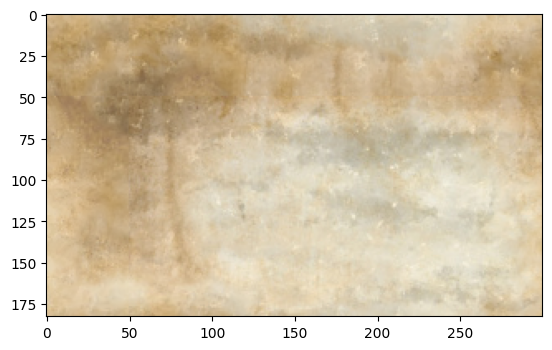

In [27]:
alpha = 0.001 #float('inf')
output_image = app.tile(image=image.to(device),
                        alpha=alpha,
                        patch_size=patch_size,
                        downscale_ratio=downscale_ratio,
                        num_levels=6,
                        reduce='weighted_mean',
                        tile_border_size=5)

#utils.imshow(output_image)
utils.imshow(torch.roll(output_image, shifts=(50,50), dims=(1,2)))